# Getting data from NOAA webpage

In [1]:
!wget -O land_global_temperature_anomaly-1880-2015.csv  https://www.ncdc.noaa.gov/cag/time-series/global/globe/land/all/1/1880-2015.csv 

--2017-01-04 16:31:17--  https://www.ncdc.noaa.gov/cag/time-series/global/globe/land/all/1/1880-2015.csv
Resolviendo www.ncdc.noaa.gov (www.ncdc.noaa.gov)... 205.167.25.172, 205.167.25.171, 2610:20:8040:2::171, ...
Conectando con www.ncdc.noaa.gov (www.ncdc.noaa.gov)[205.167.25.172]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: no especificado [text/plain]
Grabando a: “land_global_temperature_anomaly-1880-2015.csv”

    [ <=>                                   ] 23.796       131KB/s   en 0,2s   

2017-01-04 16:31:18 (131 KB/s) - “land_global_temperature_anomaly-1880-2015.csv” guardado [23796]



In [2]:
import numpy

In [3]:
!head land_global_temperature_anomaly-1880-2015.csv

Global Land Temperature Anomalies
Units: Degrees Celsius
Base Period: 1901-2000
Year,Value
188001,-0.1538
188002,-0.5771
188003,-0.7250
188004,-0.2990
188005,-0.2098
188006,-0.3002


In [4]:
numpy.loadtxt(fname='land_global_temperature_anomaly-1880-2015.csv',
              delimiter=',', skiprows=4)

array([[  1.88001000e+05,  -1.53800000e-01],
       [  1.88002000e+05,  -5.77100000e-01],
       [  1.88003000e+05,  -7.25000000e-01],
       ..., 
       [  2.01510000e+05,   1.32120000e+00],
       [  2.01511000e+05,   1.28280000e+00],
       [  2.01512000e+05,   1.87220000e+00]])

In [5]:
T_land = numpy.loadtxt(fname='land_global_temperature_anomaly-1880-2015.csv', 
                       delimiter=',', skiprows=4)

In [6]:
print(T_land)

[[  1.88001000e+05  -1.53800000e-01]
 [  1.88002000e+05  -5.77100000e-01]
 [  1.88003000e+05  -7.25000000e-01]
 ..., 
 [  2.01510000e+05   1.32120000e+00]
 [  2.01511000e+05   1.28280000e+00]
 [  2.01512000e+05   1.87220000e+00]]


In [7]:
numpy.shape(T_land)

(1632, 2)

In [8]:
T_land.shape

(1632, 2)

In [9]:
from matplotlib import pyplot
%matplotlib inline

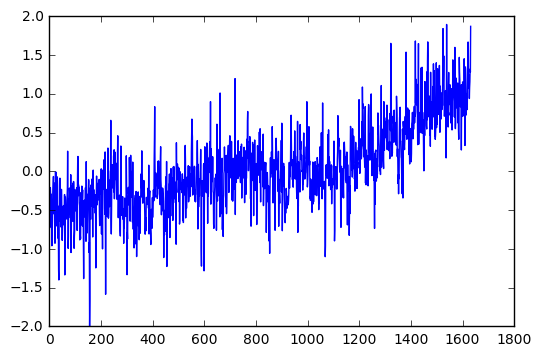

In [10]:
pyplot.plot(T_land[:,1]);

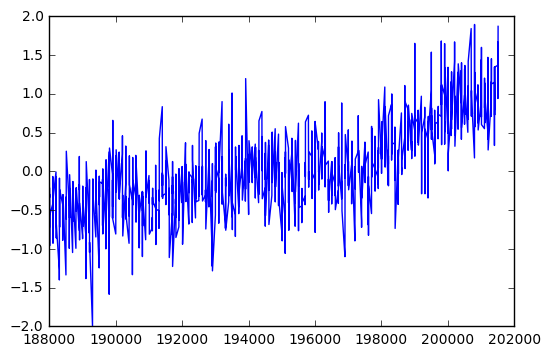

In [11]:
pyplot.plot(T_land[:,0],T_land[:,1]);

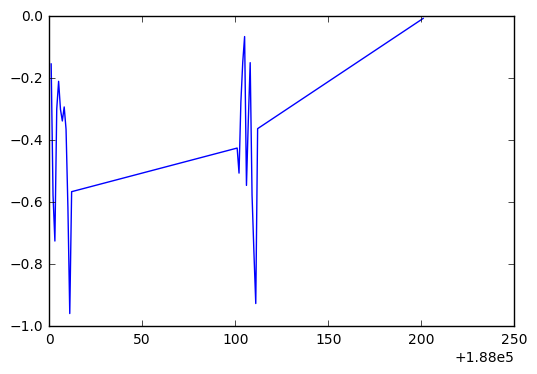

In [12]:
pyplot.plot(T_land[0:25,0],T_land[0:25,1]);

In [13]:
date = numpy.arange('1880', '2016', dtype=('datetime64[M]'))

In [14]:
print(date[0:15])

['1880-01' '1880-02' '1880-03' '1880-04' '1880-05' '1880-06' '1880-07'
 '1880-08' '1880-09' '1880-10' '1880-11' '1880-12' '1881-01' '1881-02'
 '1881-03']


In [15]:
len(T_land)

1632

In [16]:
dummy = numpy.linspace(1, 1632, 1632)

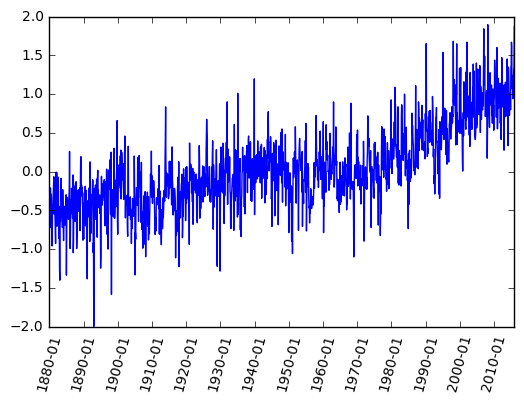

In [17]:
pyplot.xticks(dummy[::12*10], date[::12*10] , rotation=75)
pyplot.plot(dummy,T_land[:,1]);

In [18]:
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

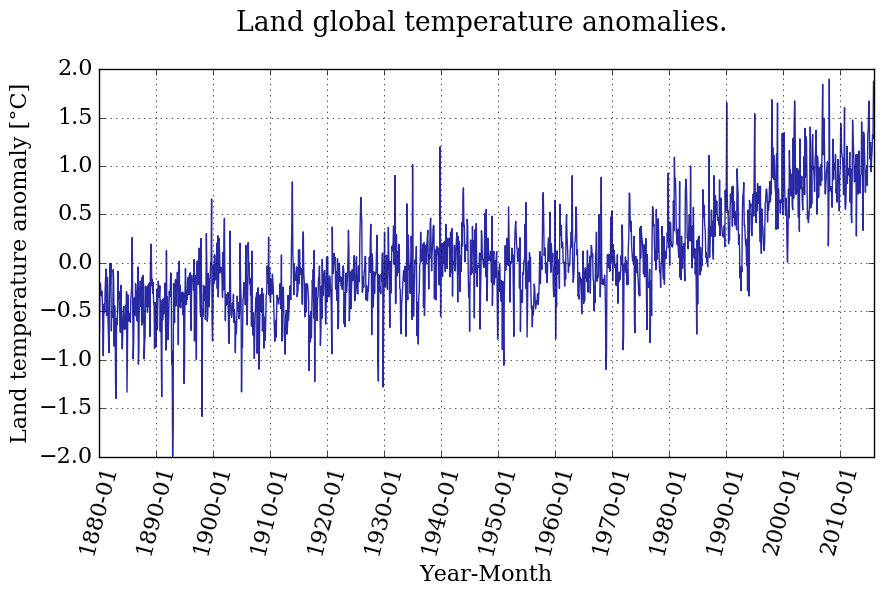

In [19]:
pyplot.figure(figsize=(10,5))
pyplot.xticks(dummy[::12*10], date[::12*10] , rotation=75)
pyplot.plot(dummy,T_land[:,1], color='#2929a3', ls='-', lw=1)
pyplot.title('Land global temperature anomalies. \n')
pyplot.xlabel('Year-Month')
pyplot.ylabel('Land temperature anomaly [°C]')
pyplot.grid();

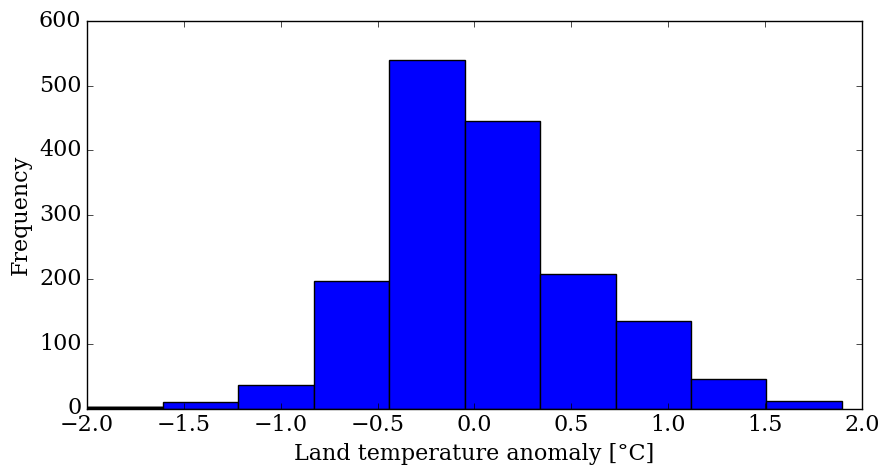

In [20]:
pyplot.figure(figsize=(10,5))
pyplot.hist(T_land[:,1])
pyplot.xlabel('Land temperature anomaly [°C]')
pyplot.ylabel('Frequency');

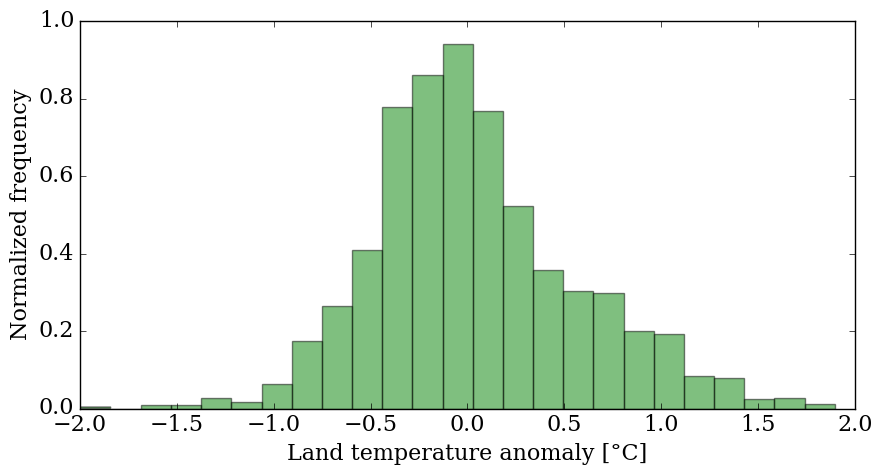

In [21]:
pyplot.figure(figsize=(10,5))
pyplot.hist(T_land[:,1], 25, normed=True, color='g', alpha=0.5)
pyplot.xlabel('Land temperature anomaly [°C]')
pyplot.ylabel('Normalized frequency');

In [22]:
mean_T = numpy.mean(T_land[:,1])
median_T = numpy.median(T_land[:,1])

print('The mean value is {:.5} and the median {:.5}'.format(mean_T, median_T))

The mean value is 0.04031 and the median -0.0276


In [23]:
variance_T = numpy.var(T_land[:,1])
sigma_T = numpy.sqrt(variance_T)
print('The variance is {:.5} and the standard deviation {:.5}'.format(variance_T, sigma_T))

The variance is 0.28041 and the standard deviation 0.52954


In [24]:
from scipy import stats

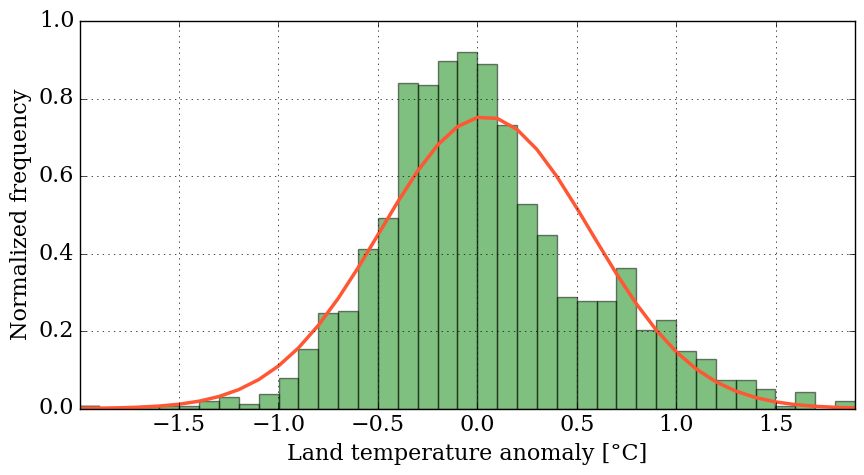

In [25]:
bins = numpy.linspace(min(T_land[:,1]), max(T_land[:,1]), 40)

pyplot.figure(figsize=(10,5))
pyplot.hist(T_land[:,1], bins, normed=True, facecolor='g', alpha=0.5)
pyplot.plot(bins, stats.norm.pdf(bins, mean_T, sigma_T),
            color='#ff5733', ls='-', lw=2.5)
pyplot.xlim(min(T_land[:,1]), max(T_land[:,1]))
pyplot.xlabel('Land temperature anomaly [°C]')
pyplot.ylabel('Normalized frequency')
pyplot.grid();

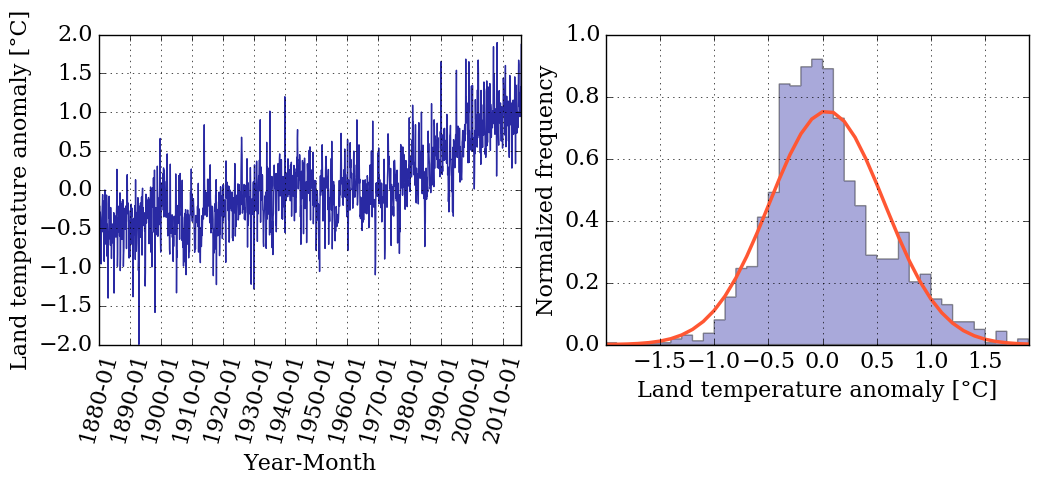

In [26]:
pyplot.figure(figsize=(12,4))  

pyplot.subplot(121)   # creates a grid of 1 row, 2 columns and 
                      # selects the first plot

pyplot.xticks(dummy[::12*10], date[::12*10] , rotation=75)   
pyplot.plot(dummy,T_land[:,1], color='#2929a3', ls='-', lw=1) 
pyplot.xlabel('Year-Month')
pyplot.ylabel('Land temperature anomaly [°C]')
pyplot.grid()

pyplot.subplot(122)            # prepares for the second plot

bins = numpy.linspace(min(T_land[:,1]), max(T_land[:,1]), 40)
pyplot.hist(T_land[:,1], bins, normed=True, color='#2929a3',
            alpha=0.4, histtype= 'stepfilled')
pyplot.plot(bins, stats.norm.pdf(bins, mean_T, sigma_T),
            color='#ff5733', ls='-', lw=2.5)
pyplot.xlim(min(T_land[:,1]), max(T_land[:,1]))
pyplot.xlabel('Land temperature anomaly [°C]')
pyplot.ylabel('Normalized frequency')
pyplot.grid();

In [27]:
def smooth_data(N, data):
    """
    Returns smoothed data using a sliding_moving avarage.

    Arguments:
    ----------
    N (int)       : amount of data values we want to average.
    data (array)  : array of data we want to smooth.


    Returns:
    --------
    smooth (array): array with smoothed data.
    """

    window = numpy.ones(N)/N
    smooth = numpy.convolve(data, window, 'same')

    return smooth

In [28]:
?smooth_data

In [29]:
smooth = smooth_data(12, T_land[:,1])

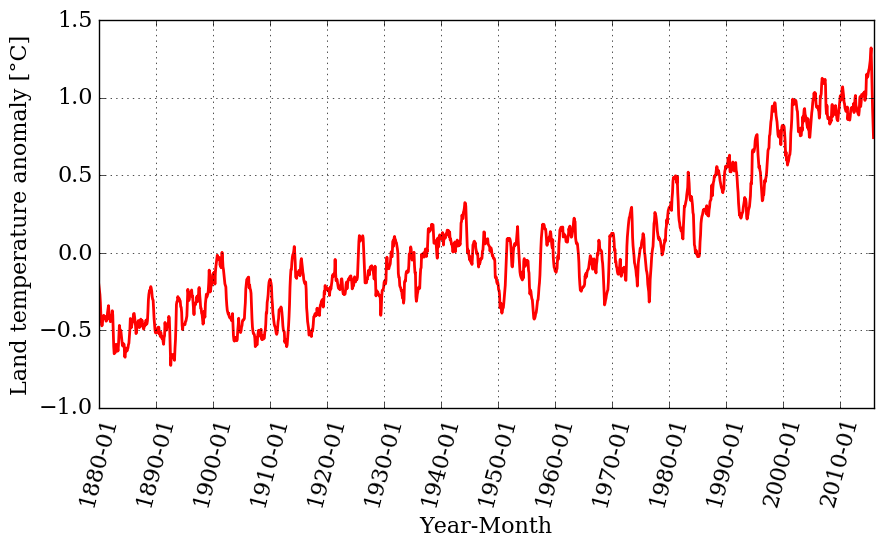

In [30]:
pyplot.figure(figsize=(10, 5))
pyplot.xticks(dummy[::12*10], date[::12*10] , rotation=75)   
pyplot.plot(dummy, smooth, color='r', ls='-', lw=2)

pyplot.xlabel('Year-Month')
pyplot.ylabel('Land temperature anomaly [°C]')
pyplot.grid(); 

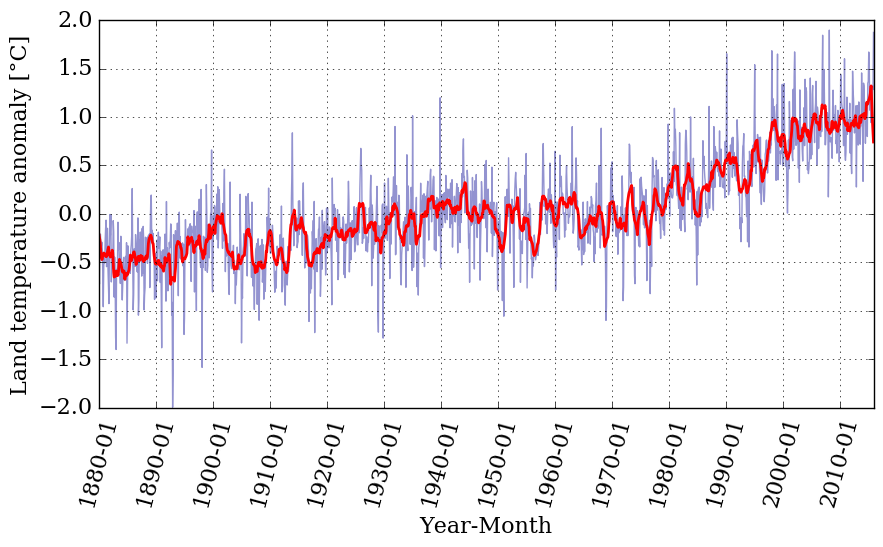

In [31]:
pyplot.figure(figsize=(10, 5))
pyplot.xticks(dummy[::12*10], date[::12*10] , rotation=75)   
pyplot.plot(dummy, T_land[:,1], color='#2929a3', ls='-', lw=1, alpha=0.5) 
pyplot.plot(dummy, smooth, color='r', ls='-', lw=2)

pyplot.xlabel('Year-Month')
pyplot.ylabel('Land temperature anomaly [°C]')
pyplot.grid(); 

In [32]:
m, b = numpy.polyfit(dummy, T_land[:,1], 1)

f_linear = numpy.poly1d((m, b)) 

In [33]:
print(f_linear)

 
0.0008322 x - 0.6392


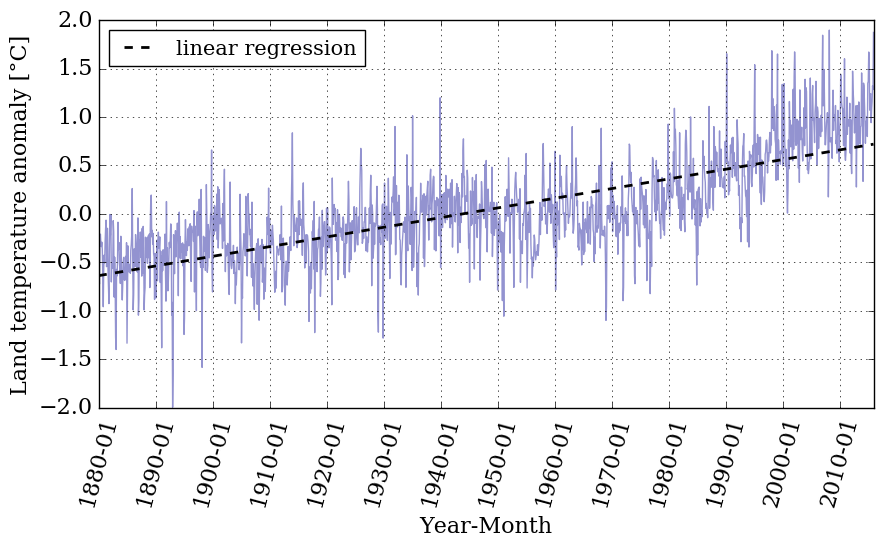

In [34]:
pyplot.figure(figsize=(10, 5))

pyplot.xticks(dummy[::12*10], date[::12*10] , rotation=75)   
pyplot.plot(dummy, T_land[:,1], color='#2929a3', ls='-', lw=1, alpha=0.5) 
pyplot.plot(dummy, f_linear(dummy), 'k--', linewidth=2,
            label='linear regression')
pyplot.xlabel('Year-Month')
pyplot.ylabel('Land temperature anomaly [°C]')
pyplot.legend(loc='best', fontsize=15)
pyplot.grid();

In [62]:
p = numpy.polyfit(dummy, T_land[:,1], 1)

f_p = numpy.polyval(p, dummy)

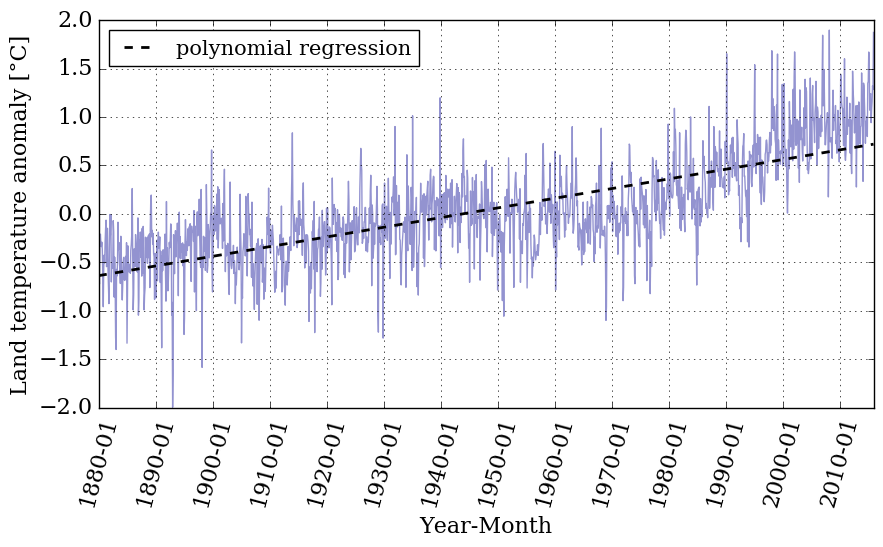

In [63]:
pyplot.figure(figsize=(10, 5))

pyplot.xticks(dummy[::12*10], date[::12*10] , rotation=75)   
pyplot.plot(dummy, T_land[:,1], color='#2929a3', ls='-', lw=1, alpha=0.5) 
pyplot.plot(dummy, f_p, 'k--', linewidth=2,
            label='polynomial regression')
pyplot.xlabel('Year-Month')
pyplot.ylabel('Land temperature anomaly [°C]')
pyplot.legend(loc='best', fontsize=15)
pyplot.grid();

In [35]:
date

array(['1880-01', '1880-02', '1880-03', ..., '2015-10', '2015-11',
       '2015-12'], dtype='datetime64[M]')

In [36]:
date[23]

numpy.datetime64('1881-12')

In [37]:
def date_index(dates_array, date_desired):
    """
    Looks for the index of a specific date in the dates_array.

    Arguments:
    ----------
    dates_array  : array,  contains the dates (dtype='datetime64[M]')
    date_desired : str, in the format YYYY-MM we want to know their 
                        index.

    Returns:
    --------
    date_index   : array, index in the dates_array that correspond to the
                   desired_date    
    """
    try:    
        date_index = numpy.where(dates_array==numpy.datetime64(date_desired))
    except ValueError:
        raise ValueError('Invalid date entered (bad format)')


    if len(date_index[0]) > 0:
        return date_index[0][0]
    else:
        raise ValueError("Date not found in date range")

In [38]:
idx_first = date_index(date, '1880-01')
idx_last  = date_index(date, '2015-12')
print('The index for 1880-01 is: {} and for 2015-12: {}'.format(idx_first, idx_last))

The index for 1880-01 is: 0 and for 2015-12: 1631


In [39]:
# Bad format date
date_index(date, '1890-13')

ValueError: Invalid date entered (bad format)

In [ ]:
year_first = dummy[idx_first]
year_last = dummy[idx_last]

reg_first = f_linear(year_first)
reg_last = f_linear(year_last)

print('Temp anomaly estimation for 1880-01: {}'.format(reg_first))
print('Temp anomaly estimation for 2015-12: {}'.format(reg_last))

In [ ]:
print('Temp anomaly data for 1880-01: {}'.format(T_land[idx_first,1]))
print('Temp anomaly data for 2015-12: {}'.format(T_land[idx_last,1]))

In [ ]:
def regression_range(start_date, end_date, date_array, x, T):
    """
    Perform a linear regression in the range of dates provided.

    Arguments:
    ----------
    start_date: str 'YYYY-MM', starting date. 
    end_date: str 'YYYY-MM', ending date.
    date_array: array, it contains the dates in the format 'YYYY-MM'.
    x: dummy array we need in order to plot to plot
    T: temperature anomalies data array.

    Returns:
    --------
    x_range: array, range of the x array used to perform the regression.
    T_range: array, range of the T array used to perform the regression.
    f_range: function, linear regression performed on the range provided.
    """

    idx_start = date_index(date_array, start_date)
    idx_end = date_index(date_array, end_date)

    x_range = x[idx_start: idx_end+1]
    T_range = T[idx_start: idx_end+1]

    m, b = numpy.polyfit(x_range, T_range, 1)

    f_range = numpy.poly1d((m,b)) 

    return x_range, T_range, f_range

In [ ]:
# First range 
x1, T1, f1 = regression_range('1880-01', '1969-12', date, dummy, T_land[:,1])

In [ ]:
# Second range
x2, T2, f2 = regression_range('1970-01', '2015-12', date, dummy, T_land[:,1])

In [ ]:
pyplot.figure(figsize=(10, 5))

pyplot.xticks(dummy[::12*10], date[::12*10] , rotation=75)   
pyplot.plot(dummy, T_land[:,1], color='#2929a3', ls='-', lw=1,
            alpha=0.4, label = 'raw data')

pyplot.plot(x1, f1(x1), 'g--', linewidth=2, label = 'reg 1880-1969')
pyplot.plot(x2, f1(x2), 'r--', linewidth=2)
pyplot.plot(x2, f2(x2), 'b--', linewidth=2, label = 'reg 1970-2015')
pyplot.xlabel('Year-Month')
pyplot.ylabel('Land temperature anomaly [°C]')
pyplot.legend(loc='best', ncol=1, fontsize=15)
pyplot.grid();

In [ ]:
mid_idx1 = date_index(date, '1925-05')
mid_idx2 = date_index(date, '1990-05')
print('The index for 1925-05 is: {} and for 1995-05: {}'.format(mid_idx1, mid_idx2))

In [ ]:
mid_year1 = dummy[mid_idx1]
mid_year2 = dummy[mid_idx2]

mid_reg1 = f1(mid_year1)
mid_reg2 = f2(mid_year2)

print('Temp anomaly estimation for 1925-05: {}'.format(mid_reg1))
print('Temp anomaly estimation for 1990-05: {}'.format(mid_reg2))

In [ ]:
print('Temp anomaly data for 1925-05: {}'.format(T_land[mid_idx1,1]))
print('Temp anomaly data for 1990-05: {}'.format(T_land[mid_idx2,1]))

In [ ]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(dummy, T_land[:,1])

In [ ]:
reg = lambda x: slope*x + intercept

In [ ]:
pyplot.figure(figsize=(10, 5))

pyplot.xticks(dummy[::12*10], date[::12*10] , rotation=75)   
pyplot.plot(dummy, T_land[:,1], color='#2929a3', ls='-', lw=1,
            alpha=0.4, label = 'raw data')

#pyplot.plot(x1, f1(x1), 'g--', linewidth=2, label = 'reg 1880-1969')
#pyplot.plot(x2, f1(x2), 'r--', linewidth=2)
#pyplot.plot(x2, f2(x2), 'b--', linewidth=2, label = 'reg 1970-2015')
pyplot.plot(dummy, reg(dummy))
pyplot.xlabel('Year-Month')
pyplot.ylabel('Land temperature anomaly [°C]')
pyplot.legend(loc='best', ncol=1, fontsize=15)
pyplot.grid();